# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [68]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [70]:
re = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

with open('image_predictions.tsv', 'wb') as f:
    f.write(re.content)
    
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [71]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [72]:
df_tweet_json = []

with open('tweet-json.txt',  encoding='UTF-8') as file:
    for line in file:
        line_json = json.loads(line)
        temp = {
            "tweet_id": line_json['id_str'],
            "retweet_count": line_json['retweet_count'],
            "favorite_count": line_json['favorite_count'],
            "retweeted": line_json["retweeted"],
            "truncated": line_json["truncated"],
            'followers_count': line_json['user']['followers_count']
            
        }
        df_tweet_json.append(temp)
        
df_tweet_json = pd.DataFrame(df_tweet_json)
df_tweet_json.head()

,favorite_count,followers_count,retweet_count,retweeted,truncated,tweet_id
0,39467,3200889,8853,False,False,892420643555336193
1,33819,3200889,6514,False,False,892177421306343426
2,25461,3200889,4328,False,False,891815181378084864
3,42908,3200889,8964,False,False,891689557279858688
4,41048,3200889,9774,False,False,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1. Assessing Twitter API Data

In [73]:
df_tweet_json.sample(10)

,favorite_count,followers_count,retweet_count,retweeted,truncated,tweet_id
901,5756,3200942,2204,False,False,758405701903519748
871,5792,3200908,1669,False,False,761334018830917632
953,8699,3200943,3440,False,False,751598357617971201
182,17135,3200891,3131,False,False,856543823941562368
2015,918,3201006,395,False,False,672160042234327040
361,11519,3200892,2329,False,False,829449946868879360
31,0,3200890,108,False,False,886054160059072513
614,0,3200900,8536,False,False,796563435802726400
1145,7496,3200945,2738,False,False,726935089318363137
434,0,3200894,2980,False,False,820446719150292993


In [74]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
retweeted          2354 non-null bool
truncated          2354 non-null bool
tweet_id           2354 non-null object
dtypes: bool(2), int64(3), object(1)
memory usage: 78.2+ KB


In [75]:
df_tweet_json.describe()

,favorite_count,followers_count,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,3.200942e+06,3164.797366
std,11814.771334,4.457302e+01,5284.770364
min,0.000000,3.200799e+06,0.000000
25%,1415.000000,3.200898e+06,624.500000
50%,3603.500000,3.200945e+06,1473.500000
75%,10122.250000,3.200953e+06,3652.000000
max,132810.000000,3.201018e+06,79515.000000


In [76]:
df_tweet_json.dtypes

favorite_count      int64
followers_count     int64
retweet_count       int64
retweeted            bool
truncated            bool
tweet_id           object
dtype: object

In [77]:
type(df_tweet_json.tweet_id[0])

str

>**1. Column tweet_id is wrong type. Convert to Int**

In [78]:
# Percentage of null values in columns
df_tweet_json.isna().sum() * 100 /len(df_tweet_json)

favorite_count     0.0
followers_count    0.0
retweet_count      0.0
retweeted          0.0
truncated          0.0
tweet_id           0.0
dtype: float64

In [79]:
df_tweet_json[df_tweet_json.duplicated()].shape[0]

0

### 2. Assessing  Tweet Image Prediction Data 

In [80]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
920,701952816642965504,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
1474,780459368902959104,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True
846,695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,Maltese_dog,0.678547,True,Lhasa,0.125046,True,Pekinese,0.048999,True
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137,True,golden_retriever,0.195558,True,Chesapeake_Bay_retriever,0.019585,True
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
806,691820333922455552,https://pbs.twimg.com/media/CZnW7JGW0AA83mn.jpg,1,minivan,0.332756,False,sports_car,0.129452,False,limousine,0.073936,False


In [81]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [82]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [83]:
df_image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [84]:
# Percentage of null values in columns
df_image.isna().sum() * 100 /len(df_image)

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [85]:
df_image[df_image.duplicated()].shape[0]

0

### 3. Assessing WeRateDogs Twitter archive data

In [86]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rory. He's got an inter...,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
1545,689289219123089408,NaN,NaN,2016-01-19 03:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone sent me this without any context and e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689289219...,13,10,None,None,None,None,None
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None,None,None,None
960,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""This photographer took pics of her best frien...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/751205363...,12,10,None,None,None,None,None
716,783821107061198850,NaN,NaN,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,None,None,None,None


> **2.  Columns: retweet_count and favorite_count should be integers, not floats. Convert to Int**

> **3. Drop unneeded columns for analysis (text, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)**

In [87]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [88]:
type(df_twitter_archive.timestamp[0])

str

> **4. The timestamp column has wrong type. Convert to datetime type.**

In [89]:
df_twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [90]:
# Percentage of null values in columns
df_twitter_archive.isna().sum() * 100 /len(df_twitter_archive)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

> **5. Some tweet are just a retweet from origin**

> **6. Drop row with null values in expanded_urls columns**

In [91]:
df_twitter_archive[df_twitter_archive.duplicated()].shape[0]

0

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

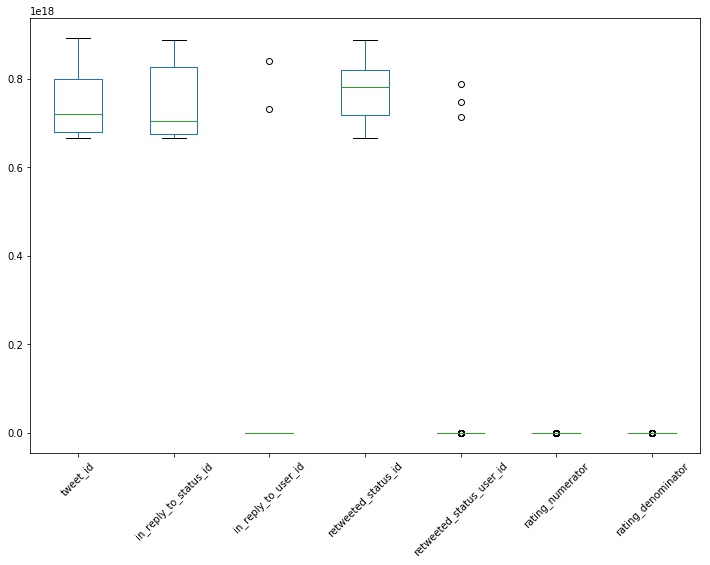

In [92]:
# Find outlier
df_twitter_archive.plot(
    kind="box", figsize=(12, 8)  # Specifies a boxplot with set width & height in inches
);
plt.xticks(rotation = 45)

In [93]:
df_twitter_archive[['doggo', 'pupper', 'puppo', 'floofer']].isnull().sum()

doggo      0
pupper     0
puppo      0
floofer    0
dtype: int64

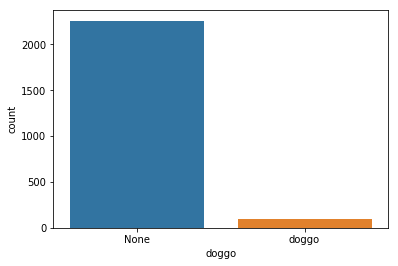

In [94]:
# Explore doggo colums
sns.countplot(x="doggo", data = df_twitter_archive)

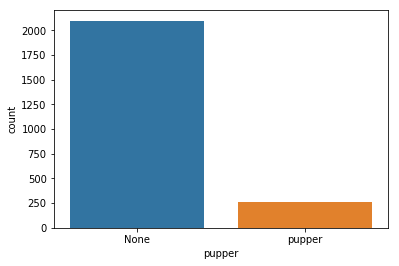

In [95]:
# Explore pupper colums
sns.countplot(x="pupper", data = df_twitter_archive)

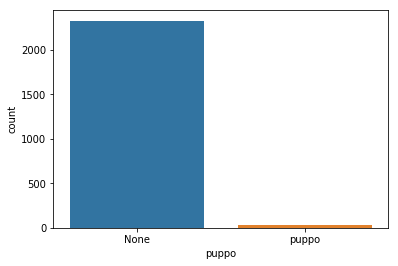

In [96]:
# Explore puppo colums
sns.countplot(x="puppo", data = df_twitter_archive)

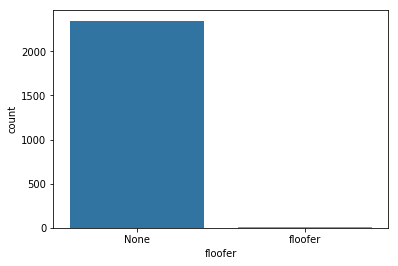

In [97]:
# Explore floofer colums
sns.countplot(x="floofer", data = df_twitter_archive)

> **7. Source column is in HTML-formatted string, not a normal string**

> **8. Dog names not corrected**

In [98]:
mask = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

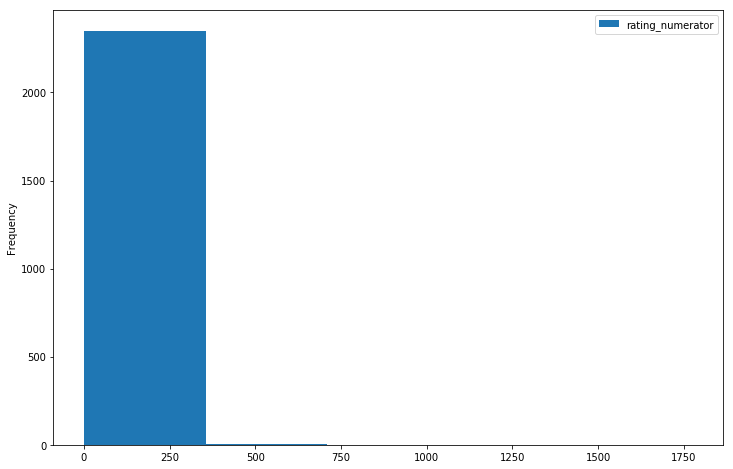

In [99]:
df_twitter_archive.plot(
    kind="hist",  # Specifies a histogram
    y="rating_numerator",  # Replace with a numeric column of interest
    bins=5,  # Set the number of bins in the histogram
    figsize=(12, 8)  # Set width & height in inches
);



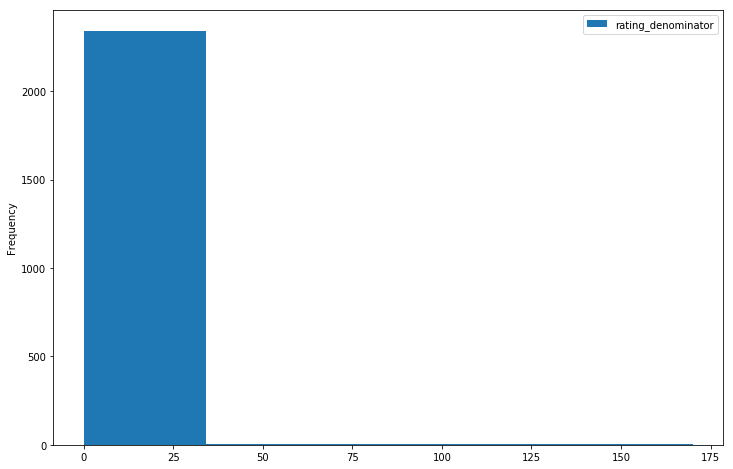

In [100]:
df_twitter_archive.plot(
    kind="hist",  # Specifies a histogram
    y="rating_denominator",  # Replace with a numeric column of interest
    bins=5,  # Set the number of bins in the histogram
    figsize=(12, 8)  # Set width & height in inches
);

### Quality issues
1. Column tweet_id is wrong type. Convert to Int

2. Columns: retweet_count and favorite_count should be integers, not floats. Convert to Int.

3. Columns unused for analysis should be drop (text, in_reply_to_status_id, in_reply_to_user_id)

4. The timestamp column has wrong type. Convert to datetime type.

5. Some tweet are just a retweet from origin

6. Column expanded_urls has rows with null values. 

7. Source column is in HTML-formatted string, not a normal string

8. Dog names not corrected

### Tidiness issues
9. Columns: doggo, floofer, pupper, and puppo should be replace with one category column name dog_type.

10. Twitter API table and Image prediction table should be merged into Twitter archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Issue #1:

#### Define: Column tweet_id is wrong type. Convert to Int

#### Code

In [101]:
df_twitter_archive.tweet_id = df_twitter_archive.tweet_id.astype('int64')

#### Test

In [102]:
type(df_twitter_archive.tweet_id[0])

numpy.int64

### Issue #2:

#### Define: retweet_count and favorite_count should be integers, not floats. Convert to Int

#### Code

In [103]:
df_tweet_json.favorite_count = df_tweet_json.favorite_count.astype(int)
df_tweet_json.retweet_count = df_tweet_json.retweet_count.astype(int)

#### Test

In [104]:
type(df_tweet_json.favorite_count[0])

numpy.int64

In [105]:
type(df_tweet_json.retweet_count[0])

numpy.int64

### Issue #3:

#### Define: Columns unused for analysis should be drop (text, in_reply_to_status_id, in_reply_to_user_id)

#### Code

In [106]:
df_twitter_archive = df_twitter_archive.drop(['text', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [107]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


### Issue #4:

#### Define: The timestamp column has wrong type. Convert to datetime type.

#### Code

In [108]:
df_twitter_archive.timestamp = df_twitter_archive.timestamp.astype('datetime64')

#### Test

In [109]:
type(df_twitter_archive.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
df_twitter_archive.timestamp[0]

Timestamp('2017-08-01 16:23:56')

### Issue #5:

#### Define: Remove retweet rows

#### Code

In [111]:
df_twitter_archive = df_twitter_archive[df_twitter_archive['retweeted_status_id'].isna() |
                                       df_twitter_archive['retweeted_status_user_id'].isna() |
                                       df_twitter_archive['retweeted_status_timestamp'].isna()]                                    

#### Test

In [112]:
# Percentage of null values in columns
df_twitter_archive.isna().sum() * 100 /len(df_twitter_archive)

tweet_id                        0.000000
timestamp                       0.000000
source                          0.000000
retweeted_status_id           100.000000
retweeted_status_user_id      100.000000
retweeted_status_timestamp    100.000000
expanded_urls                   2.666667
rating_numerator                0.000000
rating_denominator              0.000000
name                            0.000000
doggo                           0.000000
floofer                         0.000000
pupper                          0.000000
puppo                           0.000000
dtype: float64

In [113]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


### Issue #6:

#### Define: Column expanded_urls has rows with null values.

#### Code

In [114]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


In [115]:
df_twitter_archive = df_twitter_archive[df_twitter_archive['expanded_urls'].notna()]  

#### Test

In [116]:
df_twitter_archive.expanded_urls.isna().sum()

0

### Issue #7:

#### Define: Source column is in HTML-formatted string, not a normal string

#### Code

In [117]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [118]:
#extract values
df_twitter_archive.source = df_twitter_archive.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [119]:
df_twitter_archive.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Issue #8:

#### Define: Drop row which dog names not corrected

#### Code

In [120]:
wrong_name = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating',
'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite',
'space', 'such', 'the', 'this', 'unacceptable','very']

In [121]:
df_twitter_archive = df_twitter_archive.loc[~df_twitter_archive['name'].isin(wrong_name)]

#### Test

In [122]:
mask = df_twitter_archive.name.str.contains('^[a-z]', regex = True)
df_twitter_archive[mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

### Issue #9:

#### Define: Replace doggo, floofer, pupper, and puppo columns with one category column name dog_type and drop them after that

#### Code

In [123]:
df_twitter_archive['add_all'] = df_twitter_archive.doggo + df_twitter_archive.floofer + df_twitter_archive.pupper + df_twitter_archive.puppo

In [124]:
df_twitter_archive.add_all.value_counts()

NoneNoneNoneNone        1689
NoneNonepupperNone       211
doggoNoneNoneNone         70
NoneNoneNonepuppo         23
doggoNonepupperNone        9
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: add_all, dtype: int64

In [125]:
df_twitter_archive['dog_stage'] = df_twitter_archive['add_all'].astype('str')

In [126]:
df_twitter_archive['dog_stage'] = df_twitter_archive['dog_stage'].str.replace("None", "")

In [127]:
df_twitter_archive = df_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [128]:
df_twitter_archive.dog_stage.value_counts()

                1689
pupper           211
doggo             70
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

### Issue #10:

#### Define: Twitter API table and Image prediction table should be merged into Twitter archive table

#### Code

In [129]:
df_final_data = pd.merge(df_twitter_archive, df_image, on = "tweet_id", how = "left")

In [130]:
df_tweet_json["tweet_id"]  = df_tweet_json["tweet_id"].astype(int)

In [131]:
df_final_data = pd.merge(df_final_data, df_tweet_json, on = "tweet_id", how = "left")

#### Test

In [132]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2012
Data columns (total 28 columns):
tweet_id                      2013 non-null int64
timestamp                     2013 non-null datetime64[ns]
source                        2013 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2013 non-null object
rating_numerator              2013 non-null int64
rating_denominator            2013 non-null int64
name                          2013 non-null object
add_all                       2013 non-null object
dog_stage                     2013 non-null object
jpg_url                       1896 non-null object
img_num                       1896 non-null float64
p1                            1896 non-null object
p1_conf                       1896 non-null float64
p1_dog                        1896 non-null object
p2                        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [139]:
df_final_data.to_csv("twitter_archive_final.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [140]:
df_final_data = pd.read_csv('twitter_archive_final.csv')
df_final_data

,tweet_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,followers_count,retweet_count,retweeted,truncated
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.085851,False,banana,0.076110,False,39467,3200889,8853,False,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.090647,True,papillon,0.068957,True,33819,3200889,6514,False,False
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.078253,True,kelpie,0.031379,True,25461,3200889,4328,False,False
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.168086,True,spatula,0.040836,False,42908,3200889,8964,False,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.225770,True,German_short-haired_pointer,0.175219,True,41048,3200889,9774,False,False
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,0.116317,True,Indian_elephant,0.076902,False,20562,3200889,3261,False,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,0.199287,True,ice_lolly,0.193548,False,12041,3200889,2158,False,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,0.178406,True,Pembroke,0.076507,True,56848,3200889,16716,False,False
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,3200889,4429,False,False
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,0.451038,True,Chihuahua,0.029248,True,32467,3200889,7711,False,False


### Insights:
1. Year with most twitter

2. Source with most twitter

3. Dog with most popular name

#### 1. Top 5 dog breeds

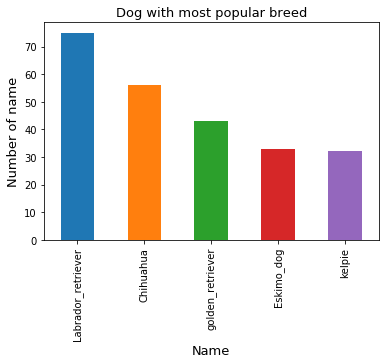

In [159]:
data_name = df_final_data.p3.value_counts()[0:5]
data_name.plot.bar()

plt.title('Dog with most popular breed', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13');
plt.ylabel('Number of name', color = 'black', fontsize = '13');

#### 2. Source with most twitter

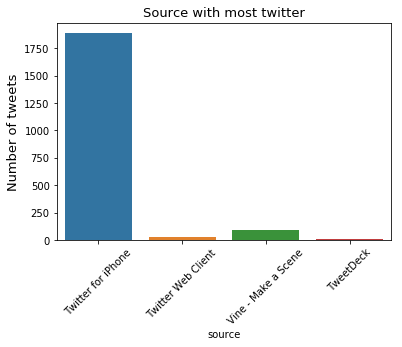

In [158]:
sns.countplot(x="source", data = df_final_data)

plt.title('Source with most twitter', color = 'black', fontsize = '13')
plt.xticks(rotation = 45)
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

#### 3. Dog with most popular name

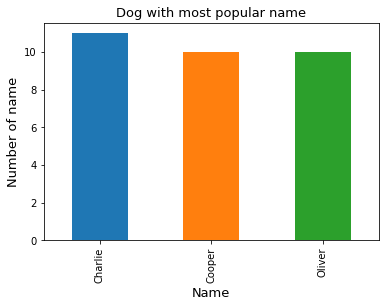

In [151]:
data_name = df_final_data.name.value_counts()[2:5]
data_name.plot.bar()

plt.title('Dog with most popular name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13');
plt.ylabel('Number of name', color = 'black', fontsize = '13');

### Visualization

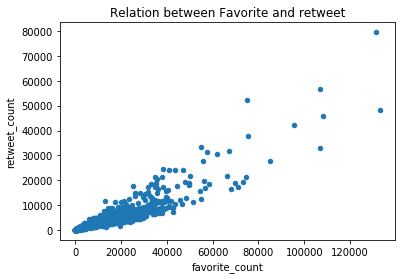

In [156]:
df_final_data.plot(x='favorite_count', y='retweet_count', kind='scatter');

plt.title('Relation between Favorite and retweet');

